
# Regressão Linear Simples



## Objetivos

Após completar esta atividade você estará habilitado para:

*   Usar a biblioteca scikit-learn para implementar uma Regressão Linear Simples
*   Criar, Treinar e Testar um Modelo


---
**Você sabia?** <br>

Quando se trata de Machine Learning, você provavelmente estará trabalhando com grandes conjuntos de dados. <br>
Onde você pode hospedar os seus dados. **pense Nisso.*** <br> 

---

### Importando os Pacotes necessários


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pylab as pl
import numpy as np
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

## Entendendo os Dados

### `FuelConsumption.csv`:

Fizemos o download de um conjunto de dados de consumo de combustível, **FuelConsumption.csv**, que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para novos veículos leves para venda no varejo no Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Lendo os dados


In [115]:
# Path do dataset na máquina
path = r'./'
os.chdir(path)
os.listdir()

['AURA0168_AULA09-Simple-Linear-Regression.ipynb',
 'AURA0168_AULA09-Mulitple-Linear-Regression_v1.ipynb',
 'FuelConsumptionCo2.csv']

In [116]:
# Carregando o Dataset
df = pd.read_csv("FuelConsumptionCo2.csv")

In [117]:
# Visualizando os dados do Dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [118]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

### Data Exploration

Vamos primeiro fazer uma exploração descritiva em nossos dados.

In [119]:
# Sumarizar os dados
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Pearson Correlation

Checando a correlação entre as variáveis.

In [120]:
# Alterar Nomes das Colunas
df.rename(columns={'FUELCONSUMPTION_CITY': 'FUELCONSCITY',
                   'FUELCONSUMPTION_HWY': 'FUELCONSHWY',
                   'FUELCONSUMPTION_COMB': 'FUELCONSCOMB', 
                   'FUELCONSUMPTION_COMB_MPG': 'FUELCONSCOMBMPG'}, inplace=True)

In [121]:
# Plot de matriz de correlação (Pearson)
corr = df.iloc[:, 1:].corr() 
display(corr.style.background_gradient(cmap='BuGn').set_precision(2))

,ENGINESIZE,CYLINDERS,FUELCONSCITY,FUELCONSHWY,FUELCONSCOMB,FUELCONSCOMBMPG,CO2EMISSIONS
ENGINESIZE,1.00,0.93,0.83,0.78,0.82,-0.81,0.87
CYLINDERS,0.93,1.00,0.80,0.72,0.78,-0.77,0.85
FUELCONSCITY,0.83,0.80,1.00,0.97,1.00,-0.94,0.90
FUELCONSHWY,0.78,0.72,0.97,1.00,0.99,-0.89,0.86
FUELCONSCOMB,0.82,0.78,1.00,0.99,1.00,-0.93,0.89
FUELCONSCOMBMPG,-0.81,-0.77,-0.94,-0.89,-0.93,1.00,-0.91
CO2EMISSIONS,0.87,0.85,0.90,0.86,0.89,-0.91,1.00


Selecionando alguns campos para explorar mais.


In [122]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSCOMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSCOMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Data Visualization

Vamos primeiro fazer uma exploração descritiva em nossos dados.

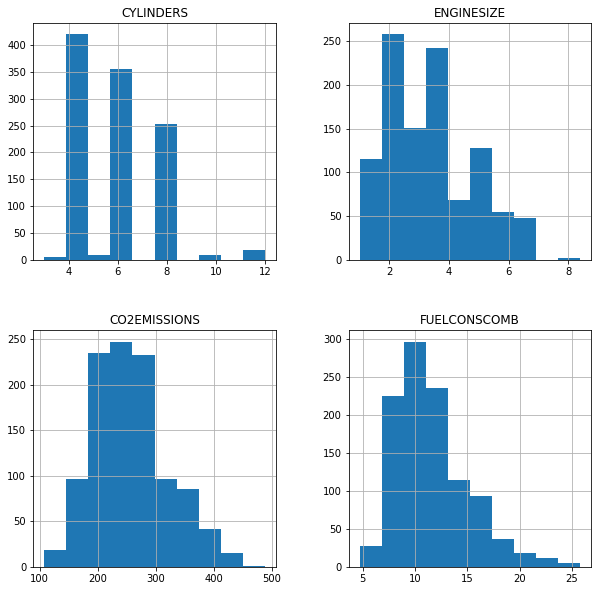

In [123]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSCOMB']]
viz.hist(figsize=(10, 10))
plt.show()

Nós podemos plotar cada um destes campos


Agora, vamos plotar cada um desses recursos em relação à Emissão, para ver quão linear é seu relacionamento:


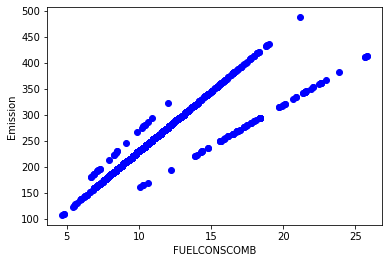

In [124]:
plt.scatter(cdf.FUELCONSCOMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSCOMB")
plt.ylabel("Emission")
plt.show()

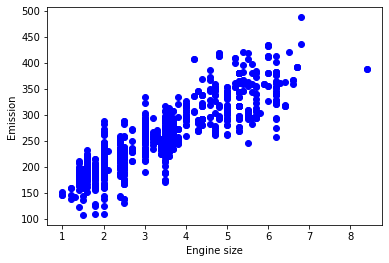

In [125]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Data Visualization

Plot **CYLINDER** vs the **Emission**, para ver o quão linear é o relacionamento entre eles.

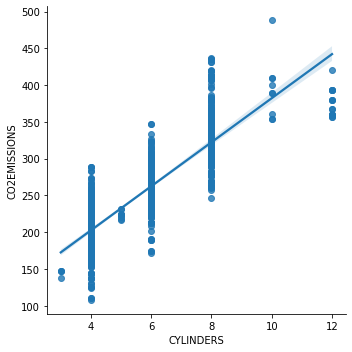

In [126]:
# Escreva o seu código aqui
dfEmission = sns.lmplot(x='CYLINDERS', y='CO2EMISSIONS', data=cdf)

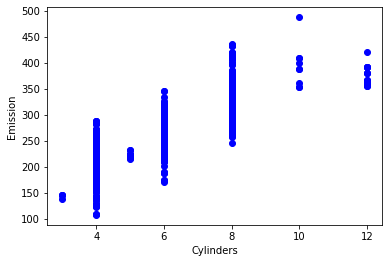

In [127]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

<details>
    <summary>Click here for the solution</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


## Dataset de Treino e Teste
---
* A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste.<br><br>
* Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar o modelo. Portanto, isso nos dá uma melhor compreensão de quão bem nosso modelo generaliza em novos dados.
<br><br>
* Isso significa que sabemos o resultado de cada ponto de dados no conjunto de dados de teste, tornando-o ótimo para testar! Como esses dados não foram usados para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.
<br><br>
* Vamos dividir nosso conjunto de dados em conjuntos de treinamento e teste. 
    - 70% de todo o conjunto de dados será usado para treinamento e 
    - 30% para teste. 
<br><br>

**Obs.:** Criamos uma máscara para selecionar linhas aleatórias usando a função **np.random.rand()**:


In [128]:
df.shape

(1067, 13)

In [129]:
msk = np.random.rand(len(df)) < 0.75
dfTrain = cdf[msk]
dfTest = cdf[~msk]

In [130]:
print('Dataset de Treino = ', dfTrain.shape)
print('Dataset de Test   = ', dfTest.shape)

Dataset de Treino =  (807, 4)
Dataset de Test   =  (260, 4)


### Simple Regression Model

A Regressão Linear ajusta um modelo linear com coeficientes B = (B1, ..., Bn) para minimizar a 'soma dos quadrados residual' entre o valor real y no conjunto de dados e o valor previsto yhat usando aproximação linear.

#### Treino - Distribuição de Dados (Data distribution)


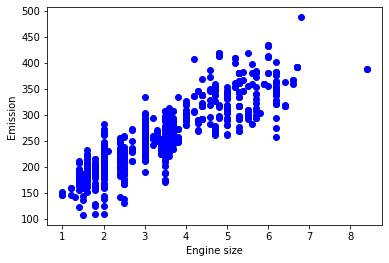

In [131]:
plt.scatter(dfTrain.ENGINESIZE, dfTrain.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

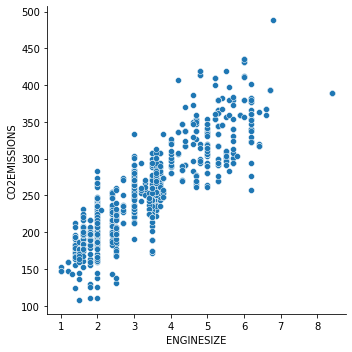

In [132]:
sns.relplot(x='ENGINESIZE', y='CO2EMISSIONS', data=dfTrain)

### Modelo

Usando a biblioteca sklearn package para modelar os dados.


In [133]:
# Import da biblioteca sklearn
from sklearn import linear_model

# Modelo de Regressão Linear
regr = linear_model.LinearRegression()

# Treinando os valores de X (Var Independente - Explicativa)  e Y (Var Dependente - Alvo/Target)
train_x = np.asanyarray(dfTrain[['ENGINESIZE']])
train_y = np.asanyarray(dfTrain[['CO2EMISSIONS']])

# Realizando o Ajuste da Linha
regr.fit(train_x, train_y)

# Definindo os valores do coefficients - Theta 0: Intercepto e Theta 1: Coeficiente
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[39.19178713]]
Intercept:  [124.29277624]


Como mencionado anteriormente, **Coeficiente** e **Interceptação** na regressão linear simples, são os parâmetros da linha de ajuste. 
<br><br>
Dado que se trata de uma regressão linear simples, com apenas **2 parâmetros**, e sabendo que os parâmetros são o intercepto e a inclinação da linha, o **sklearn** pode estimá-los diretamente a partir de nossos dados. 
<br><br>
Observe que todos os dados devem estar disponíveis para percorrer e calcular os parâmetros.


### Plotagem de Gráficos
Podemos traçar a linha de ajuste sobre os dados

Text(0, 0.5, 'Emission')

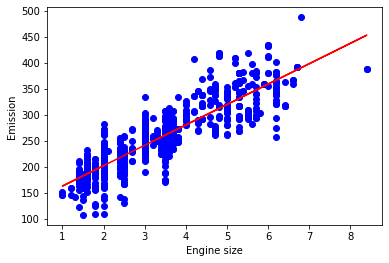

In [134]:
plt.scatter(dfTrain.ENGINESIZE, dfTrain.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

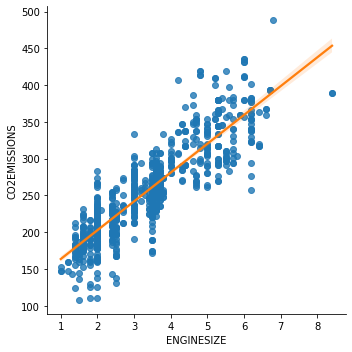

In [135]:
sns.lmplot(x='ENGINESIZE', y='CO2EMISSIONS', line_kws={"color": "C1"}, data=dfTrain)

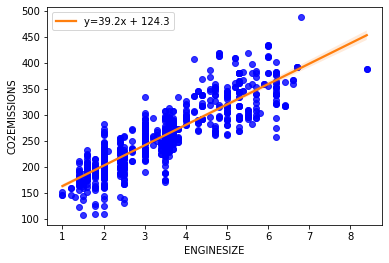

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfTrain['ENGINESIZE'],dfTrain['CO2EMISSIONS'])

# use line_kws to set line label for legend
ax = sns.regplot(x="ENGINESIZE", 
                 y="CO2EMISSIONS", 
                 data=dfTrain, color='b',
                 line_kws={'label':"y={0:.1f}x + {1:.1f}".format(slope,intercept),"color": "C1"})

# plot legend
ax.legend()

plt.show()

### Avaliação (Teste & Validação)

* Comparamos os valores reais e os valores previstos para calcular a precisão de um modelo de regressão. 
* As métricas de avaliação desempenham um papel fundamental no desenvolvimento de um modelo, pois fornecem insights para áreas que precisam ser aprimoradas.

Existem diferentes métricas de avaliação do modelo, vamos usar o MSE aqui para calcular a precisão do nosso modelo com base no conjunto de teste:

*   **Mean Absolute Error:** É a média do valor absoluto dos erros. Essa é a métrica mais fácil de entender, pois é apenas um erro médio. <br><br>

*   **Mean Squared Error (MSE):** O erro quadrático médio (MSE) é a média do erro quadrático. É mais popular que o erro médio absoluto porque o foco é mais voltado para erros grandes. Isso se deve ao fato de o termo quadrado aumentar exponencialmente os erros maiores em comparação com os menores.<br><br>

*   **Root Mean Squared Error (RMSE)**.<br><br>

*   **R-squared** não é um erro, mas sim uma métrica popular para medir o desempenho do seu modelo de regressão. Ele representa o quão perto os pontos de dados estão da linha de regressão ajustada. Quanto maior o valor do R-quadrado, melhor o modelo se ajusta aos seus dados. A melhor pontuação possível é 1,0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior).

In [137]:
from sklearn.metrics import r2_score

# Testando os valores de X (Var Independente - Explicativa)  e Y (Var Dependente - Alvo/Target)
test_x = np.asanyarray(dfTest[['ENGINESIZE']])
test_y = np.asanyarray(dfTest[['CO2EMISSIONS']])

# Cálculo do Modelo de Previsão
test_y_ = regr.predict(test_x)

# Verificando os Scores de relação entre as variáveis
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 22.21
Residual sum of squares (MSE): 864.61
R2-score: 0.77


## Exercício



Vamos ver quais são as métricas de avaliação se treinamos um modelo de regressão usando a variável **'FUELCONSUMPTION_COMB'**.

Comece selecionando **'FUELCONSUMPTION_COMB'** como os dados train_x do dataframe **'dfTrain'**, então selecione **'FUELCONSUMPTION_COMB'** como os dados test_x do dataframe **'dfTest'**


In [138]:
# Import da biblioteca sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score

# Modelo de Regressão Linear
regr = linear_model.LinearRegression()

# Treinando os valores de X (Var Independente - Explicativa)  e Y (Var Dependente - Alvo/Target)
train_x = np.asanyarray(dfTrain[['FUELCONSCOMB']])
train_y = np.asanyarray(dfTrain[['CO2EMISSIONS']])

# Testando os valores de X (Var Independente - Explicativa)  e Y (Var Dependente - Alvo/Target)
test_x = np.asanyarray(dfTest[['FUELCONSCOMB']])
test_y = np.asanyarray(dfTest[['CO2EMISSIONS']])

Agora treine um modelo de regressão linear usando o **'train_x'** que você criou e o **'train_y'** criado anteriormente

In [139]:
#ADD CODE# Realizando o Ajuste da Linha
regr.fit(train_x, train_y)

# Definindo os valores do coefficients - Theta 0: Intercepto e Theta 1: Coeficiente
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[16.24846913]]
Intercept:  [68.11400139]


Encontre as previsões usando a função de previsão do modelo e os dados **'test_x'**


In [140]:

# Cálculo do Modelo de Previsão
test_y_ = regr.predict(test_x)

Finalmente, use as **previsões** e os dados **test_y** e encontre o valor do Erro Absoluto Médio usando a função **np.absolute** e **np.mean** como feito anteriormente


In [141]:
#ADD CODE
# Verificando os Scores de relação entre as variáveis
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 19.31
Residual sum of squares (MSE): 783.90
R2-score: 0.79


Podemos ver que o mean é muito pior quando treinamos usando **ENGINESIZE** do que **FUELCONSUMPTION_COMB**


---
### Thank you